In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
x,y=mnist["data"],mnist["target"]
x.shape
y.shape

/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000,)

In [21]:
#using display it matplotlib's imshow()
#reshape
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)

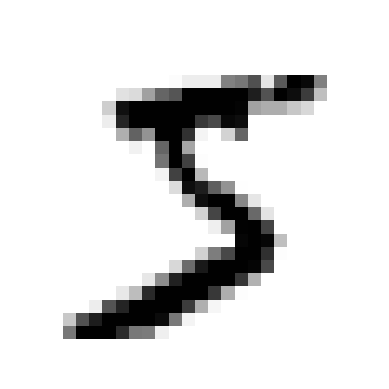

In [22]:
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [89]:
#ml algoritham expect numbers
y = y.astype(np.uint8)

In [26]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8


In [90]:
#spliting data sets into training sets
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [91]:
print(x_train)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [92]:
#5-detector
y_train_5 =(y_train == 5)
print(y_train_5)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


In [93]:
#create the target vector
y_test_5 =(y_test ==5)
print(y_test_5)

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool


In [94]:
#training a model
from sklearn.linear_model import SGDClassifier
sdg_clf =  SGDClassifier(random_state=42)
sdg_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [95]:
#use to predict
sdg_clf.predict([some_digit])


/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [96]:
#check performance
from sklearn.model_selection import cross_val_score

In [97]:
cross_val_score (sdg_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [98]:
#classify but should not belongs to 5
from sklearn.base import BaseEstimator


In [99]:
class never5Classifier(BaseEstimator):
    def fit(self,x,y = None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [100]:
never_5_clf = never5Classifier()
cross_val_score (sdg_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [101]:
#which tells true or false
from sklearn.model_selection import cross_val_predict

In [109]:
y_train_predict = cross_val_predict(sdg_clf,x_train,y_train_5,cv=3)

In [103]:
print(y_train_predict)

[ True False False ...  True False False]


In [104]:
#gave an array
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [106]:
#precision and recall
from sklearn.metrics import precision_score,recall_score

In [107]:
precision_score(y_train_5,y_train_predict)
recall_score(y_train_5,y_train_predict)

0.6511713705958311

In [108]:
#combine precision an recall into a single metrix called the f1 score
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343846